In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats

In [152]:
df = pd.read_csv("complaints_coverage_by_state_malaysia.csv")
df.head()


,complaint_id,area_id,state,district,latitude,longitude,coverage_status,last_updated,issue_type,network_type,status,reported_date,call_duration,signal_strength,dropped_call,call_duration_mins,reported_month,reported_months
0,CMP-00000,AREA-0002,Sarawak,Miri,3.909955,113.623266,Moderate,31/12/2025,No Signal,5G,In Progress,2025-12-10,3174,3,0,52.900000,12,December
1,CMP-00001,AREA-0021,Pahang,Temerloh,3.559106,103.391911,Good,29/12/2025,Call Drop,4G,Resolved,2025-08-09,3507,4,1,58.450000,8,August
2,CMP-00002,AREA-0090,Johor,Batu Pahat,2.028487,103.360142,Poor,27/12/2025,Poor Coverage,5G,Resolved,2025-10-28,860,2,0,14.333333,10,October
3,CMP-00003,AREA-0000,Kedah,Sungai Petani,5.301319,100.441777,Moderate,17/12/2025,Slow Speed,Fiber,In Progress,2025-11-23,1294,4,0,21.566667,11,November
4,CMP-00004,AREA-0007,Sabah,Kota Kinabalu,5.982145,115.641092,Good,17/12/2025,Call Drop,5G,Resolved,2025-04-09,1130,4,0,18.833333,4,April


In [102]:
df.columns

Index(['complaint_id', 'area_id', 'state', 'district', 'latitude', 'longitude',
       'coverage_status', 'last_updated', 'issue_type', 'network_type',
       'status', 'reported_date', 'call_duration', 'signal_strength',
       'dropped_call'],
      dtype='object')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   complaint_id     1000 non-null   object 
 1   area_id          1000 non-null   object 
 2   state            1000 non-null   object 
 3   district         1000 non-null   object 
 4   latitude         1000 non-null   float64
 5   longitude        1000 non-null   float64
 6   coverage_status  1000 non-null   object 
 7   last_updated     1000 non-null   object 
 8   issue_type       1000 non-null   object 
 9   network_type     1000 non-null   object 
 10  status           1000 non-null   object 
 11  reported_date    1000 non-null   object 
 12  call_duration    1000 non-null   int64  
 13  signal_strength  1000 non-null   int64  
 14  dropped_call     1000 non-null   int64  
dtypes: float64(2), int64(3), object(10)
memory usage: 117.3+ KB


In [104]:
df["reported_date"] = pd.to_datetime(df["reported_date"], format="mixed")

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   complaint_id     1000 non-null   object        
 1   area_id          1000 non-null   object        
 2   state            1000 non-null   object        
 3   district         1000 non-null   object        
 4   latitude         1000 non-null   float64       
 5   longitude        1000 non-null   float64       
 6   coverage_status  1000 non-null   object        
 7   last_updated     1000 non-null   object        
 8   issue_type       1000 non-null   object        
 9   network_type     1000 non-null   object        
 10  status           1000 non-null   object        
 11  reported_date    1000 non-null   datetime64[ns]
 12  call_duration    1000 non-null   int64         
 13  signal_strength  1000 non-null   int64         
 14  dropped_call     1000 non-null   int64   

In [107]:
df.select_dtypes("object").columns

Index(['complaint_id', 'area_id', 'state', 'district', 'coverage_status',
       'last_updated', 'issue_type', 'network_type', 'status'],
      dtype='object')

In [108]:
df.select_dtypes("int64").columns

Index(['call_duration', 'signal_strength', 'dropped_call'], dtype='object')

In [109]:
df.select_dtypes("float64").columns

Index(['latitude', 'longitude'], dtype='object')

In [110]:
state_counts = (
    df.groupby("state")
      .size()
      .reset_index(name="complaint_count")
      .sort_values(by="complaint_count", ascending=False)
)

state_counts


,state,complaint_count
3,Penang,143
2,Pahang,130
7,Selangor,129
5,Sabah,124
6,Sarawak,124
1,Kedah,120
0,Johor,116
4,Perak,114


In [ ]:
pip install folium

In [111]:
import folium

# 1️⃣ Create base map
m = folium.Map(
    location=[4.5, 109.5],   # tengah Malaysia
    zoom_start=6,
    tiles="cartodbpositron"
)

# 2️⃣ Add choropleth
folium.Choropleth(
    geo_data="malaysia.state.geojson",   # ikut nama file sebenar
    data=state_counts,
    columns=["state", "complaint_count"],
    key_on="feature.properties.state",
    fill_color="YlOrRd",
    fill_opacity=0.8,
    line_opacity=0.3,
    legend_name="Number of Complaints by State"
).add_to(m)

# 3️⃣ Display map
m


In [112]:
import json

with open("malaysia.state.geojson") as f:
    geo = json.load(f)

sorted(set([f["properties"]["state"] for f in geo["features"]]))


['JHR',
 'KDH',
 'KTN',
 'KUL',
 'LBN',
 'MLK',
 'NSN',
 'PHG',
 'PJY',
 'PLS',
 'PNG',
 'PRK',
 'SBH',
 'SGR',
 'SWK',
 'TRG']

In [113]:
state_mapping = {
    "Penang": "Pulau Pinang",
    "Kuala Lumpur": "Wilayah Persekutuan Kuala Lumpur",
    "Labuan": "Wilayah Persekutuan Labuan",
    "Putrajaya": "Wilayah Persekutuan Putrajaya"
}

state_counts["state"] = state_counts["state"].replace(state_mapping)


In [114]:
folium.Choropleth(
    geo_data="malaysia.state.geojson",
    data=state_counts,
    columns=["state", "complaint_count"],
    key_on="feature.properties.state",
    fill_color="YlOrRd",
    fill_opacity=0.8,
    line_opacity=0.3,
    legend_name="Number of Complaints by State"
).add_to(m)
 
m

In [115]:
df.columns

Index(['complaint_id', 'area_id', 'state', 'district', 'latitude', 'longitude',
       'coverage_status', 'last_updated', 'issue_type', 'network_type',
       'status', 'reported_date', 'call_duration', 'signal_strength',
       'dropped_call'],
      dtype='object')

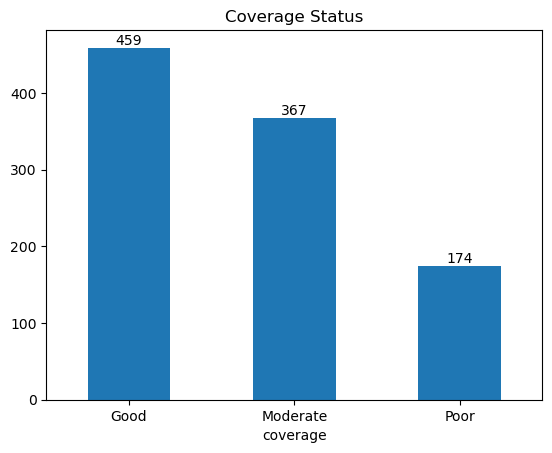

In [116]:
ax = df["coverage_status"].value_counts().plot.bar()
for container in ax.containers:
     ax.bar_label(container)
plt.title("Coverage Status")
plt.xlabel("coverage")
plt.xticks(rotation=0)
plt.show()

In [117]:
df.head()

,complaint_id,area_id,state,district,latitude,longitude,coverage_status,last_updated,issue_type,network_type,status,reported_date,call_duration,signal_strength,dropped_call
0,CMP-00000,AREA-0002,Sarawak,Miri,3.909955,113.623266,Moderate,31/12/2025,No Signal,5G,In Progress,2025-12-10,3174,3,0
1,CMP-00001,AREA-0021,Pahang,Temerloh,3.559106,103.391911,Good,29/12/2025,Call Drop,4G,Resolved,2025-08-09,3507,4,1
2,CMP-00002,AREA-0090,Johor,Batu Pahat,2.028487,103.360142,Poor,27/12/2025,Poor Coverage,5G,Resolved,2025-10-28,860,2,0
3,CMP-00003,AREA-0000,Kedah,Sungai Petani,5.301319,100.441777,Moderate,17/12/2025,Slow Speed,Fiber,In Progress,2025-11-23,1294,4,0
4,CMP-00004,AREA-0007,Sabah,Kota Kinabalu,5.982145,115.641092,Good,17/12/2025,Call Drop,5G,Resolved,2025-04-09,1130,4,0


In [118]:
disit = pd.crosstab(index=df["district"], columns=df["issue_type"])



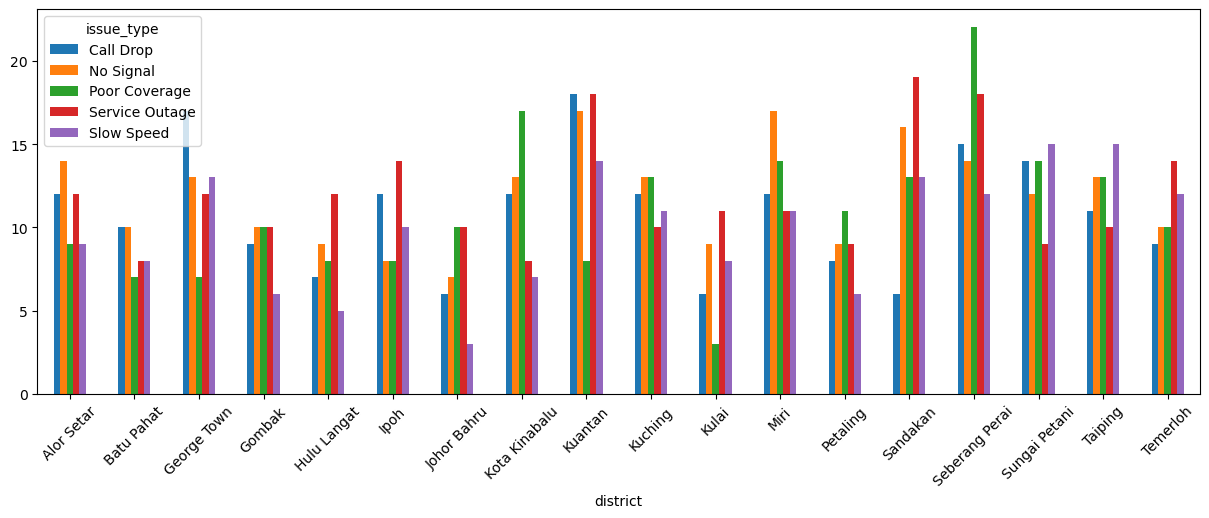

In [119]:
fig, ax = plt.subplots(figsize=(15, 5))
disit.plot.bar(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()


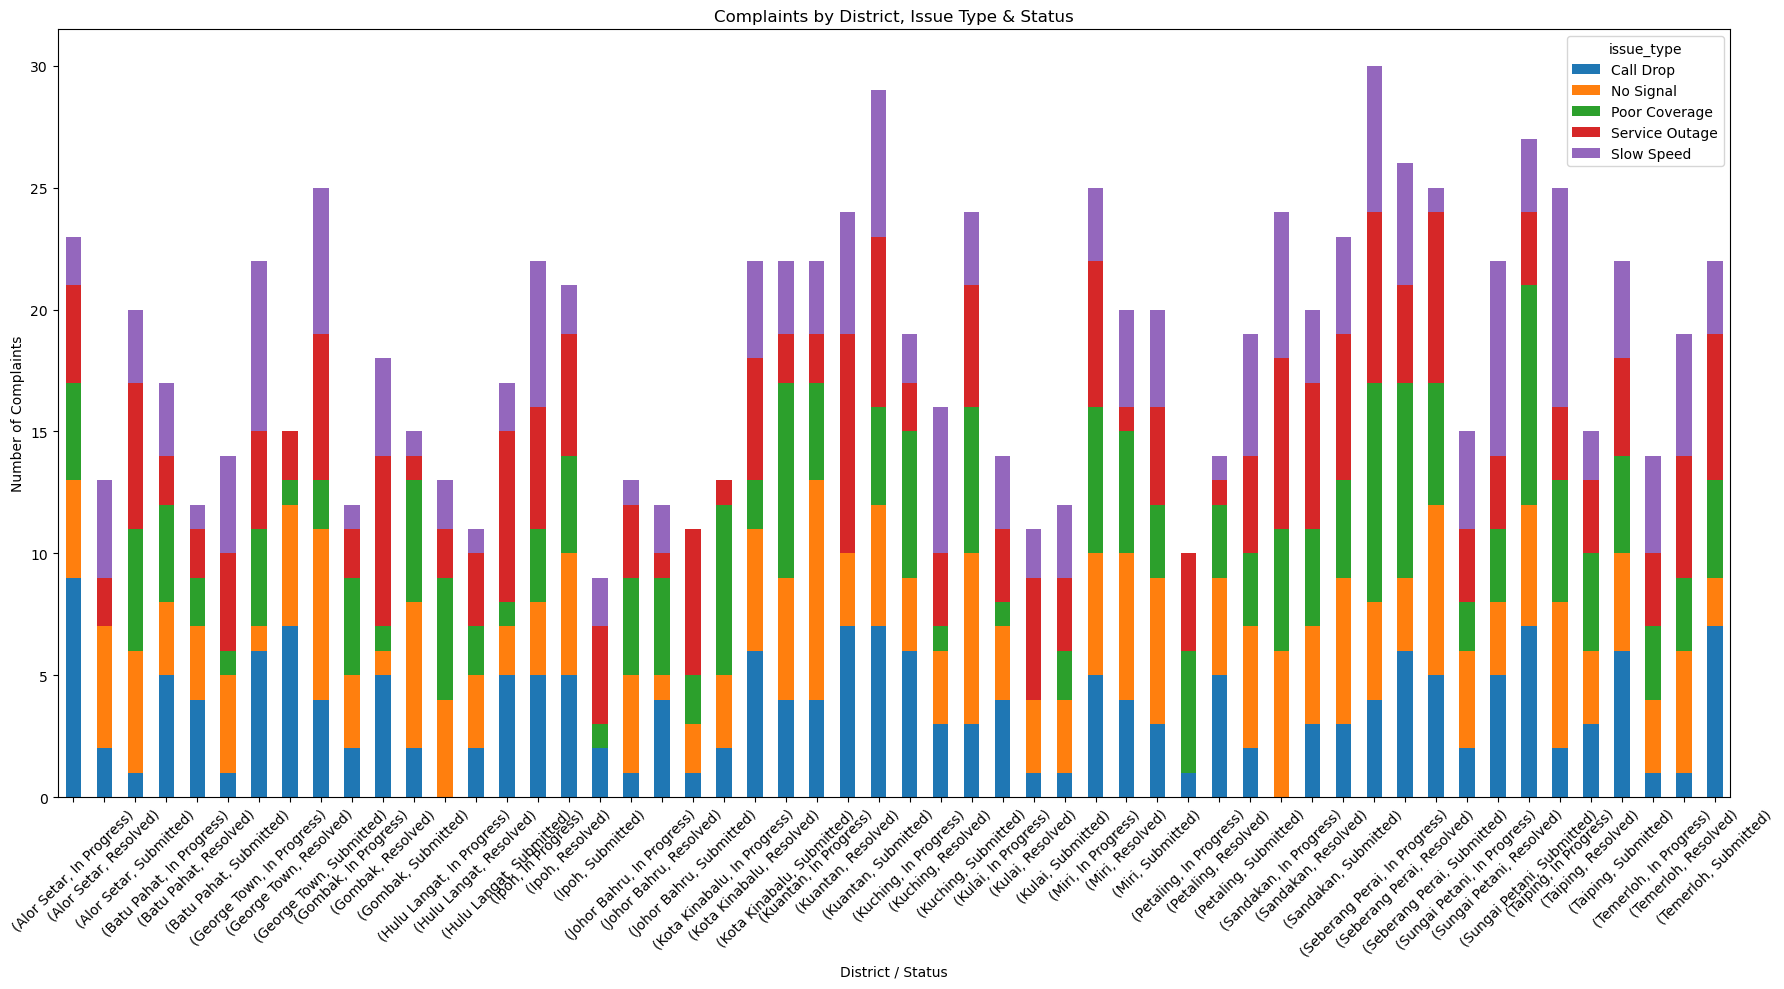

In [120]:
# kira bilangan aduan
ct = pd.crosstab(
    index=[df["district"], df["status"]],
    columns=df["issue_type"]
)

fig, ax = plt.subplots(figsize=(18, 10))
ct.plot(
    kind="bar",
    stacked=True,
    ax=ax
)

ax.set_title("Complaints by District, Issue Type & Status")
ax.set_xlabel("District / Status")
ax.set_ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [121]:
df["state"].value_counts().describe()

count      8.000000
mean     125.000000
std        9.211794
min      114.000000
25%      119.000000
50%      124.000000
75%      129.250000
max      143.000000
Name: count, dtype: float64

In [122]:
df1 = pd.read_csv("complaints_coverage_singapore.csv")
df1.head()

,complaint_id,area_id,state,district,latitude,longitude,technology,coverage_status,last_updated,issue_type,network_type,status,reported_date,call_duration,signal_strength,dropped_call
0,465838,3773,North-East,Ang Mo Kio,1.361150,103.800625,4G,Poor,2025-01-01,Call Drop,Fixed Wireless,Open,2024-01-01,3171,2,0
1,818315,2434,East,Changi,1.249093,103.682532,5G,Moderate,2025-01-01,Slow Internet,Mobile,Open,2024-01-01,474,2,0
2,748143,1807,North-East,Punggol,1.323139,103.953329,4G,Poor,2025-01-01,No Signal,Mobile,Open,2024-01-01,646,4,0
3,370936,2364,East,Changi,1.352088,103.773437,5G,Good,2025-01-01,Slow Internet,Fixed Wireless,In Progress,2024-01-01,3003,3,0
4,922352,1956,North,Sembawang,1.249204,103.939913,5G,Moderate,2025-01-01,Slow Internet,Fixed Wireless,Closed,2024-01-01,1500,1,0


In [ ]:
df

In [123]:
df.head()

,complaint_id,area_id,state,district,latitude,longitude,coverage_status,last_updated,issue_type,network_type,status,reported_date,call_duration,signal_strength,dropped_call
0,CMP-00000,AREA-0002,Sarawak,Miri,3.909955,113.623266,Moderate,31/12/2025,No Signal,5G,In Progress,2025-12-10,3174,3,0
1,CMP-00001,AREA-0021,Pahang,Temerloh,3.559106,103.391911,Good,29/12/2025,Call Drop,4G,Resolved,2025-08-09,3507,4,1
2,CMP-00002,AREA-0090,Johor,Batu Pahat,2.028487,103.360142,Poor,27/12/2025,Poor Coverage,5G,Resolved,2025-10-28,860,2,0
3,CMP-00003,AREA-0000,Kedah,Sungai Petani,5.301319,100.441777,Moderate,17/12/2025,Slow Speed,Fiber,In Progress,2025-11-23,1294,4,0
4,CMP-00004,AREA-0007,Sabah,Kota Kinabalu,5.982145,115.641092,Good,17/12/2025,Call Drop,5G,Resolved,2025-04-09,1130,4,0


In [124]:
df1["status"].value_counts()

status
Open           355
In Progress    324
Closed         321
Name: count, dtype: int64

In [125]:
df["status"].value_counts()

status
Submitted      356
In Progress    333
Resolved       311
Name: count, dtype: int64

In [126]:
df["issue_type"].value_counts()

issue_type
Service Outage    215
No Signal         214
Poor Coverage     197
Call Drop         196
Slow Speed        178
Name: count, dtype: int64

In [127]:
df1["issue_type"].value_counts()

issue_type
Call Drop        338
No Signal        333
Slow Internet    329
Name: count, dtype: int64

In [128]:
df["issue_type"].value_counts()

issue_type
Service Outage    215
No Signal         214
Poor Coverage     197
Call Drop         196
Slow Speed        178
Name: count, dtype: int64

In [129]:
df1["issue_type"].value_counts()

issue_type
Call Drop        338
No Signal        333
Slow Internet    329
Name: count, dtype: int64

In [130]:
df["status"].value_counts()

status
Submitted      356
In Progress    333
Resolved       311
Name: count, dtype: int64

In [131]:
df.head()

,complaint_id,area_id,state,district,latitude,longitude,coverage_status,last_updated,issue_type,network_type,status,reported_date,call_duration,signal_strength,dropped_call
0,CMP-00000,AREA-0002,Sarawak,Miri,3.909955,113.623266,Moderate,31/12/2025,No Signal,5G,In Progress,2025-12-10,3174,3,0
1,CMP-00001,AREA-0021,Pahang,Temerloh,3.559106,103.391911,Good,29/12/2025,Call Drop,4G,Resolved,2025-08-09,3507,4,1
2,CMP-00002,AREA-0090,Johor,Batu Pahat,2.028487,103.360142,Poor,27/12/2025,Poor Coverage,5G,Resolved,2025-10-28,860,2,0
3,CMP-00003,AREA-0000,Kedah,Sungai Petani,5.301319,100.441777,Moderate,17/12/2025,Slow Speed,Fiber,In Progress,2025-11-23,1294,4,0
4,CMP-00004,AREA-0007,Sabah,Kota Kinabalu,5.982145,115.641092,Good,17/12/2025,Call Drop,5G,Resolved,2025-04-09,1130,4,0


In [132]:
df.select_dtypes("int64").columns

Index(['call_duration', 'signal_strength', 'dropped_call'], dtype='object')

In [133]:
dfint = df[["call_duration", "signal_strength", "dropped_call"]]
dfint.describe()

,call_duration,signal_strength,dropped_call
count,1000.000000,1000.000000,1000.000000
mean,1840.882000,2.457000,0.197000
std,1040.345169,1.714377,0.397931
min,1.000000,0.000000,0.000000
25%,956.000000,1.000000,0.000000
50%,1797.500000,3.000000,0.000000
75%,2808.250000,4.000000,0.000000
max,3587.000000,5.000000,1.000000


In [134]:
dfint.corr()

,call_duration,signal_strength,dropped_call
call_duration,1.000000,0.000545,0.090502
signal_strength,0.000545,1.000000,-0.019117
dropped_call,0.090502,-0.019117,1.000000


In [135]:
df.groupby("state", as_index=False)["call_duration"].sum()

,state,call_duration
0,Johor,223367
1,Kedah,209328
2,Pahang,242387
3,Penang,261834
4,Perak,205757
5,Sabah,241739
6,Sarawak,212641
7,Selangor,243829


In [136]:
df["call_duration_mins"] = df["call_duration"]/60

In [137]:
df.head()

,complaint_id,area_id,state,district,latitude,longitude,coverage_status,last_updated,issue_type,network_type,status,reported_date,call_duration,signal_strength,dropped_call,call_duration_mins
0,CMP-00000,AREA-0002,Sarawak,Miri,3.909955,113.623266,Moderate,31/12/2025,No Signal,5G,In Progress,2025-12-10,3174,3,0,52.900000
1,CMP-00001,AREA-0021,Pahang,Temerloh,3.559106,103.391911,Good,29/12/2025,Call Drop,4G,Resolved,2025-08-09,3507,4,1,58.450000
2,CMP-00002,AREA-0090,Johor,Batu Pahat,2.028487,103.360142,Poor,27/12/2025,Poor Coverage,5G,Resolved,2025-10-28,860,2,0,14.333333
3,CMP-00003,AREA-0000,Kedah,Sungai Petani,5.301319,100.441777,Moderate,17/12/2025,Slow Speed,Fiber,In Progress,2025-11-23,1294,4,0,21.566667
4,CMP-00004,AREA-0007,Sabah,Kota Kinabalu,5.982145,115.641092,Good,17/12/2025,Call Drop,5G,Resolved,2025-04-09,1130,4,0,18.833333


In [138]:
df.groupby("state", as_index=False)["call_duration_mins"].median().sort_values(by = "call_duration_mins", ascending=False)

,state,call_duration_mins
5,Sabah,33.225000
2,Pahang,31.350000
7,Selangor,30.716667
0,Johor,29.391667
4,Perak,29.225000
3,Penang,28.883333
6,Sarawak,28.258333
1,Kedah,28.108333


In [139]:
df["reported_month"] = df["reported_date"].dt.month 

In [140]:
df["reported_month"].value_counts()

reported_month
10    204
11    194
12    182
9     167
4      37
5      35
8      34
2      32
7      30
1      29
6      28
3      28
Name: count, dtype: int64

In [143]:
def month(b):
    if b == 1: return "January"
    if b == 2: return "February"
    if b == 3: return "March"
    if b == 4: return "April"
    if b == 5: return "May"
    if b == 6: return "June"
    if b == 7: return "July"
    if b == 8: return "August"
    if b == 9: return "September"
    if b == 10: return "October"
    if b == 11: return "November"
    if b == 12: return "December"

df["reported_months"] = df["reported_month"].apply(month)
df.head()

,complaint_id,area_id,state,district,latitude,longitude,coverage_status,last_updated,issue_type,network_type,status,reported_date,call_duration,signal_strength,dropped_call,call_duration_mins,reported_month,reported_months
0,CMP-00000,AREA-0002,Sarawak,Miri,3.909955,113.623266,Moderate,31/12/2025,No Signal,5G,In Progress,2025-12-10,3174,3,0,52.900000,12,December
1,CMP-00001,AREA-0021,Pahang,Temerloh,3.559106,103.391911,Good,29/12/2025,Call Drop,4G,Resolved,2025-08-09,3507,4,1,58.450000,8,August
2,CMP-00002,AREA-0090,Johor,Batu Pahat,2.028487,103.360142,Poor,27/12/2025,Poor Coverage,5G,Resolved,2025-10-28,860,2,0,14.333333,10,October
3,CMP-00003,AREA-0000,Kedah,Sungai Petani,5.301319,100.441777,Moderate,17/12/2025,Slow Speed,Fiber,In Progress,2025-11-23,1294,4,0,21.566667,11,November
4,CMP-00004,AREA-0007,Sabah,Kota Kinabalu,5.982145,115.641092,Good,17/12/2025,Call Drop,5G,Resolved,2025-04-09,1130,4,0,18.833333,4,April


In [149]:
df.to_csv("complaints_coverage_by_state_malaysia.csv", index=False)

In [150]:
df2 = pd.read_csv("complaints_coverage_by_state_malaysia.csv")
df2

,complaint_id,area_id,state,district,latitude,longitude,coverage_status,last_updated,issue_type,network_type,status,reported_date,call_duration,signal_strength,dropped_call,call_duration_mins,reported_month,reported_months
0,CMP-00000,AREA-0002,Sarawak,Miri,3.909955,113.623266,Moderate,31/12/2025,No Signal,5G,In Progress,2025-12-10,3174,3,0,52.900000,12,December
1,CMP-00001,AREA-0021,Pahang,Temerloh,3.559106,103.391911,Good,29/12/2025,Call Drop,4G,Resolved,2025-08-09,3507,4,1,58.450000,8,August
2,CMP-00002,AREA-0090,Johor,Batu Pahat,2.028487,103.360142,Poor,27/12/2025,Poor Coverage,5G,Resolved,2025-10-28,860,2,0,14.333333,10,October
3,CMP-00003,AREA-0000,Kedah,Sungai Petani,5.301319,100.441777,Moderate,17/12/2025,Slow Speed,Fiber,In Progress,2025-11-23,1294,4,0,21.566667,11,November
4,CMP-00004,AREA-0007,Sabah,Kota Kinabalu,5.982145,115.641092,Good,17/12/2025,Call Drop,5G,Resolved,2025-04-09,1130,4,0,18.833333,4,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CMP-00995,AREA-0022,Sabah,Sandakan,4.120480,116.588477,Good,5/1/2026,No Signal,Fiber,In Progress,2025-10-27,3493,5,0,58.216667,10,October
996,CMP-00996,AREA-0014,Johor,Kulai,1.592044,103.538960,Good,11/1/2026,No Signal,Fiber,Submitted,2025-12-14,763,4,0,12.716667,12,December
997,CMP-00997,AREA-0041,Perak,Ipoh,4.824465,101.080134,Moderate,20/12/2025,Poor Coverage,4G,Resolved,2025-03-12,2785,0,0,46.416667,3,March
998,CMP-00998,AREA-0023,Selangor,Hulu Langat,3.047283,101.465257,Good,26/12/2025,Call Drop,4G,Submitted,2025-09-23,2853,0,0,47.550000,9,September
